### <font color='violet'> **Loan Status Example** </font>


In [ ]:
# impoting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#!gdown 15B0YXLJhx41faA2rVyifWMjlmpuFqAxc

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=15B0YXLJhx41faA2rVyifWMjlmpuFqAxc -O loan.csv

--2024-05-16 03:51:05--  https://drive.google.com/uc?id=15B0YXLJhx41faA2rVyifWMjlmpuFqAxc
Resolving drive.google.com (drive.google.com)... 172.253.62.113, 172.253.62.138, 172.253.62.102, ...
Connecting to drive.google.com (drive.google.com)|172.253.62.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=15B0YXLJhx41faA2rVyifWMjlmpuFqAxc [following]
--2024-05-16 03:51:06--  https://drive.usercontent.google.com/download?id=15B0YXLJhx41faA2rVyifWMjlmpuFqAxc
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.16.132, 2607:f8b0:4004:c17::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.16.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38011 (37K) [application/octet-stream]
Saving to: ‘loan.csv’

loan.csv            100%[===================>]  37.12K  --.-KB/s    in 0.001s  

2024-05-16 03:51:06 (67.7 MB/s) - ‘loan.

In [ ]:
data = pd.read_csv('loan.csv')
data.shape

(614, 13)

<font color='violet'> **Dataset Description:**</font>

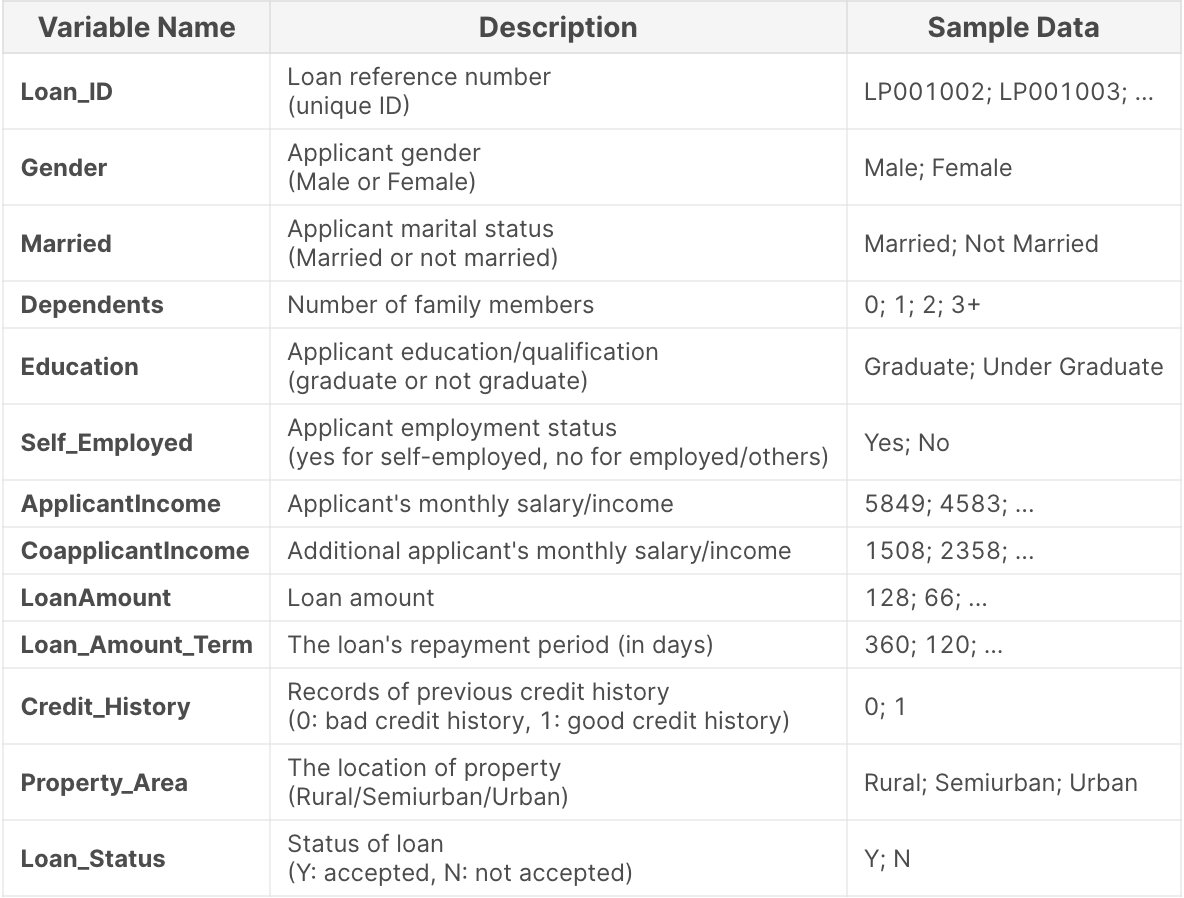

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Here,   

Target: **Loan_Status**  
Remaining columns: **Features**  

Based on features --> Predict target.

In [ ]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [ ]:
data = data.drop("Loan_ID", axis=1)

In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data.describe(include=['object'])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [ ]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
## categorical

cat_cols = data.dtypes=='object'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
num_cols = data.dtypes !='object'
num_cols = list(num_cols[num_cols].index)
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
cat_cols.remove("Loan_Status")
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

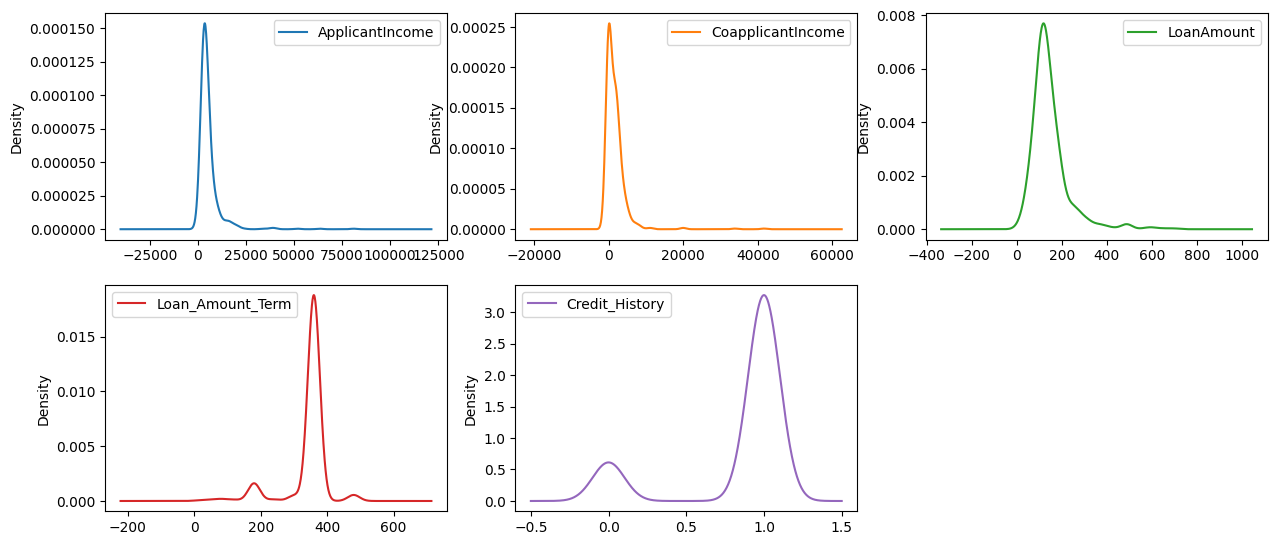

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15,10]
data.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

## Univariate Analysis

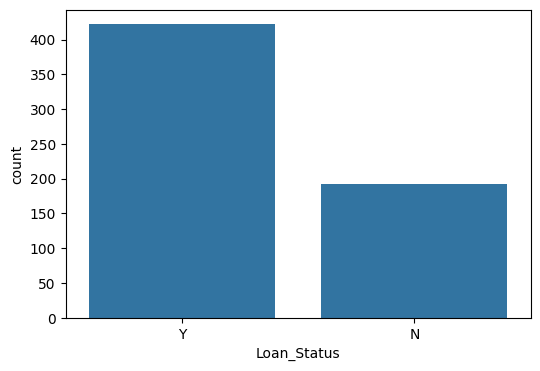

In [ ]:
plt.rcParams["figure.figsize"] = [6,4]
sns.countplot(data=data, x='Loan_Status')
plt.show()

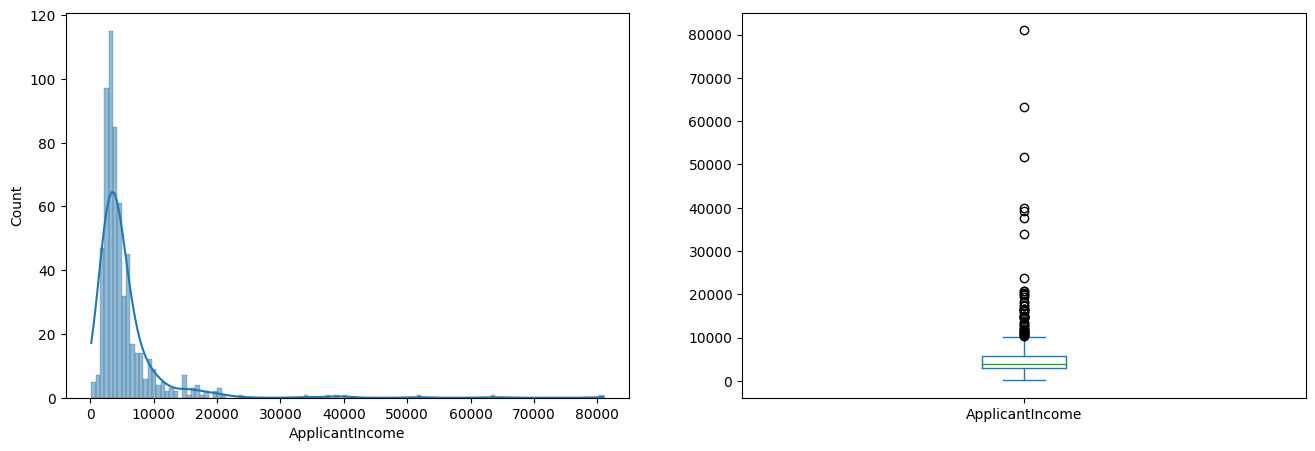

In [ ]:
plt.subplot(121)
sns.histplot(data['ApplicantIncome'], kde=True)

plt.subplot(122)
data['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

In [ ]:
data.groupby("Loan_Status")['ApplicantIncome'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [ ]:
from scipy.stats import ttest_ind

a = data[data["Loan_Status"] == "Y"]['ApplicantIncome']
b = data[data["Loan_Status"] == "N"]['ApplicantIncome']

ttest_ind(a,b)

TtestResult(statistic=-0.11650844828724542, pvalue=0.907287812130518, df=612.0)

## Binning

In [ ]:
bins = [0, 2500, 4000, 6000, 8000, 10000, 20000, 40000, 81000]
group = ['Low', 'Average', 'Medium', 'H1', 'H2', 'H3', 'H4', 'Very High']

In [ ]:
data["income_bin"] = pd.cut(data['ApplicantIncome'], bins, labels=group)

In [ ]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,Medium
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Medium
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,Average
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,Medium
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,H2
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,H1


In [ ]:
pd.crosstab(data['income_bin'], data['Loan_Status'], normalize="index")

Loan_Status,N,Y
income_bin,,
Low,0.314815,0.685185
Average,0.296460,0.703540
Medium,0.314685,0.685315
H1,0.370370,0.629630
H2,0.290323,0.709677
H3,0.325000,0.675000
H4,0.333333,0.666667
Very High,0.333333,0.666667


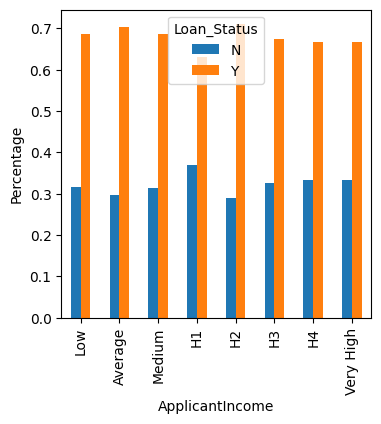

In [ ]:
Income_bin = pd.crosstab(data["income_bin"],data["Loan_Status"], normalize="index")
Income_bin.plot(kind="bar",figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
val = pd.crosstab(index=data["income_bin"], columns=data["Loan_Status"]).values
print(val)

# H0: Loan status and Income are independent
chi2_contingency(val) # chi_stat, p_value, df, expected_values

[[ 34  74]
 [ 67 159]
 [ 45  98]
 [ 20  34]
 [  9  22]
 [ 13  27]
 [  3   6]
 [  1   2]]


Chi2ContingencyResult(statistic=1.2420001711303135, pvalue=0.9899274842922701, dof=7, expected_freq=array([[ 33.77198697,  74.22801303],
       [ 70.67100977, 155.32899023],
       [ 44.71661238,  98.28338762],
       [ 16.88599349,  37.11400651],
       [  9.69381107,  21.30618893],
       [ 12.50814332,  27.49185668],
       [  2.81433225,   6.18566775],
       [  0.93811075,   2.06188925]]))

## Create New Features

In [ ]:
data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

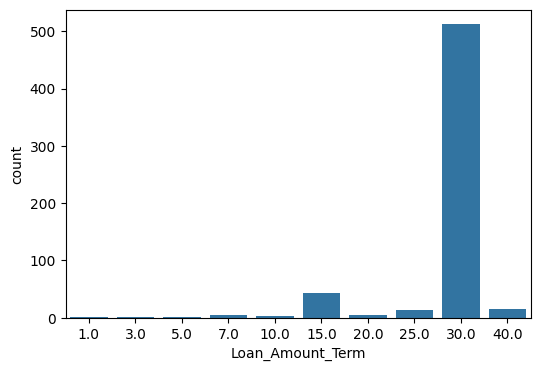

In [ ]:
data['Loan_Amount_Term'] = (data['Loan_Amount_Term'] / 12).astype('float')

sns.countplot(x='Loan_Amount_Term', data=data)
plt.show()

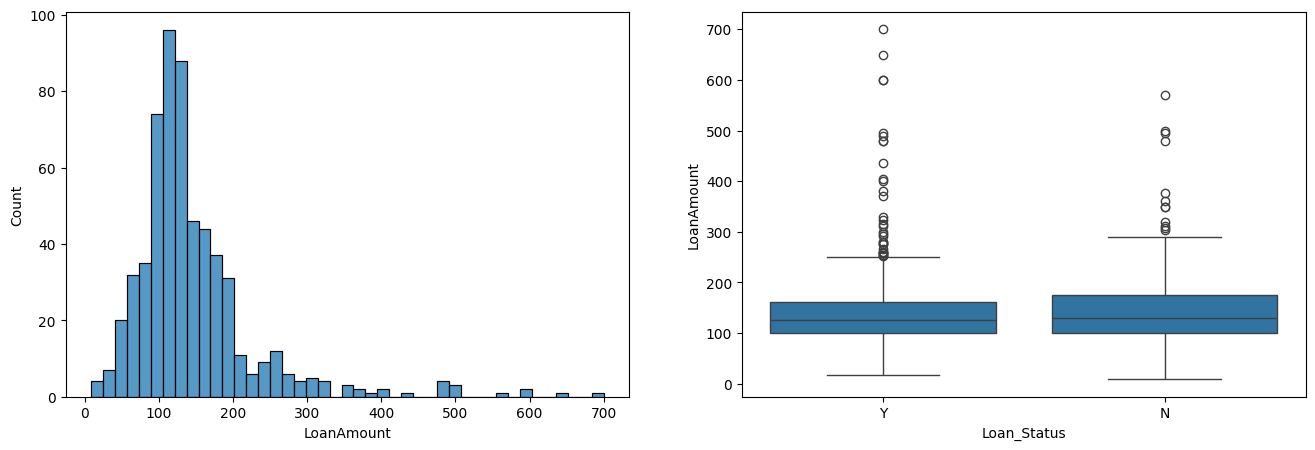

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.histplot(data['LoanAmount']);

plt.subplot(122)
sns.boxplot(data=data, x='Loan_Status', y = 'LoanAmount')

plt.show()

## New Feature - Ability of pay EMI

In [ ]:
data['LoanAmount_per_year'] = data['LoanAmount'] / data['Loan_Amount_Term']

data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_bin,LoanAmount_per_year
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,Medium,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,4.266667
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,2.200000
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4.000000
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,4.700000


In [ ]:
data['EMI'] = data['LoanAmount_per_year']*1000 / 12
data['EMI']

0             NaN
1      355.555556
2      183.333333
3      333.333333
4      391.666667
          ...    
609    197.222222
610    222.222222
611    702.777778
612    519.444444
613    369.444444
Name: EMI, Length: 614, dtype: float64

In [ ]:
data['Able_to_pay_EMI'] = (data['ApplicantIncome'] * 0.3 > data['EMI']).astype('int')
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_bin,LoanAmount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,Medium,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,4.700000,391.666667,1


<Axes: xlabel='Able_to_pay_EMI', ylabel='count'>

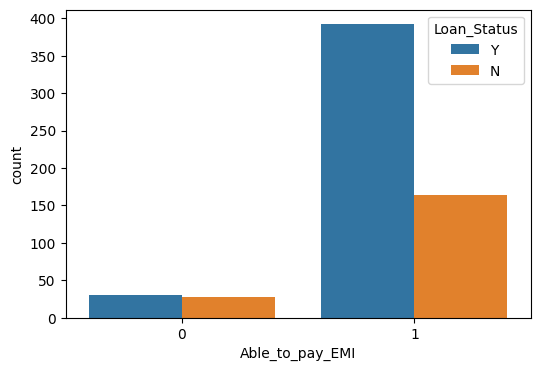

In [ ]:
sns.countplot(x='Able_to_pay_EMI', data = data, hue = 'Loan_Status')

In [ ]:
vals = pd.crosstab(data['Able_to_pay_EMI'], data['Loan_Status'])
vals

Loan_Status,N,Y
Able_to_pay_EMI,,
0,28,30
1,164,392


In [ ]:
chi2_contingency(vals)

Chi2ContingencyResult(statistic=7.766699881892571, pvalue=0.005321818938263173, dof=1, expected_freq=array([[ 18.13680782,  39.86319218],
       [173.86319218, 382.13680782]]))

# Feature Engineering - 2

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_bin,LoanAmount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,Medium,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,4.700000,391.666667,1


In [ ]:
data["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [ ]:
data["Dependents"].replace("3+", 3, inplace = True)

In [ ]:
data["Dependents"].value_counts()

Dependents
0    345
1    102
2    101
3     51
Name: count, dtype: int64

In [ ]:
data.isna().sum()

Gender                 13
Married                 3
Dependents             15
Education               0
Self_Employed          32
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount             22
Loan_Amount_Term       14
Credit_History         50
Property_Area           0
Loan_Status             0
income_bin              0
LoanAmount_per_year    36
EMI                    36
Able_to_pay_EMI         0
dtype: int64

In [ ]:
missing_val = pd.DataFrame(
    {
        "Missing_Values" : data.isna().sum(),
        "Percentage" : data.isna().sum()*100/len(data)
    }
    )

In [ ]:
missing_val

,Missing_Values,Percentage
Gender,13,2.117264
Married,3,0.488599
Dependents,15,2.442997
Education,0,0.000000
Self_Employed,32,5.211726
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000
LoanAmount,22,3.583062
Loan_Amount_Term,14,2.280130
Credit_History,50,8.143322


In [ ]:
missing_val.sort_values(by = "Percentage", ascending = False)

,Missing_Values,Percentage
Credit_History,50,8.143322
LoanAmount_per_year,36,5.863192
EMI,36,5.863192
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Education,0,0.000000


#Missing Values Imputation

In [ ]:
data["Credit_History"].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [ ]:
475 + 89

564

In [ ]:
data.shape

(614, 16)

In [ ]:
475 + 89 + 50

614

In [ ]:
data["Credit_History"].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [ ]:
pd.crosstab(data["Credit_History"], data["Loan_Status"])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [ ]:
chi2_contingency(pd.crosstab(data["Credit_History"], data["Loan_Status"]))

Chi2ContingencyResult(statistic=174.63729658142535, pvalue=7.184759548750746e-40, dof=1, expected_freq=array([[ 28.2464539,  60.7535461],
       [150.7535461, 324.2464539]]))

<Axes: xlabel='Credit_History', ylabel='count'>

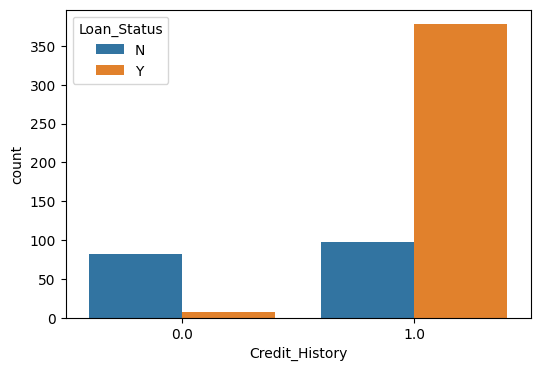

In [ ]:
sns.countplot(x = data["Credit_History"], hue = data["Loan_Status"])

In [ ]:
data["Credit_History"].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [ ]:
data["Credit_History"] = data["Credit_History"].fillna(2)
data["Credit_History"].value_counts()

Credit_History
1.0    475
0.0     89
2.0     50
Name: count, dtype: int64

In [ ]:
data["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [ ]:
data["Self_Employed"].isna().sum()

32

In [ ]:
data["Self_Employed"] = data["Self_Employed"].fillna("Other")
data["Self_Employed"].value_counts()

Self_Employed
No       500
Yes       82
Other     32
Name: count, dtype: int64

In [ ]:
data["Self_Employed"].isna().sum()

0

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
a = pd.DataFrame([10, 10, 20, 10, 30, 10, np.nan, 50])
a

,0
0,10.0
1,10.0
2,20.0
3,10.0
4,30.0
5,10.0
6,NaN
7,50.0


In [ ]:
np.mean(a)

20.0

In [ ]:
SimpleImputer(strategy = "mean").fit_transform(a)

array([[10.],
       [10.],
       [20.],
       [10.],
       [30.],
       [10.],
       [20.],
       [50.]])

In [ ]:
a.mode()

,0
0,10.0


In [ ]:
SimpleImputer(strategy = "most_frequent").fit_transform(a)

array([[10.],
       [10.],
       [20.],
       [10.],
       [30.],
       [10.],
       [10.],
       [50.]])

In [ ]:
SimpleImputer(strategy = "constant", fill_value = 100).fit_transform(a)

array([[ 10.],
       [ 10.],
       [ 20.],
       [ 10.],
       [ 30.],
       [ 10.],
       [100.],
       [ 50.]])

In [ ]:
data.isna().sum()

Gender                 13
Married                 3
Dependents             15
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount             22
Loan_Amount_Term       14
Credit_History          0
Property_Area           0
Loan_Status             0
income_bin              0
LoanAmount_per_year    36
EMI                    36
Able_to_pay_EMI         0
dtype: int64

In [ ]:
num_missing = ['EMI', 'LoanAmount_per_year',  'LoanAmount',  'Loan_Amount_Term']

median_imputer = SimpleImputer(strategy = "median")

for col in num_missing:
  data[col] = pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(data[col])))

In [ ]:
data.isna().sum()

Gender                 13
Married                 3
Dependents             15
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
income_bin              0
LoanAmount_per_year     0
EMI                     0
Able_to_pay_EMI         0
dtype: int64

In [ ]:
cat_missing = ['Gender', 'Married', 'Dependents']

freq_imputer = SimpleImputer(strategy = "most_frequent")

for col in cat_missing:
  data[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(data[col])))

In [ ]:
data.isna().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
income_bin             0
LoanAmount_per_year    0
EMI                    0
Able_to_pay_EMI        0
dtype: int64

In [ ]:
# a = "aj"
# print(a)

#Outlier Treatment

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               614 non-null    object  
 1   Married              614 non-null    object  
 2   Dependents           614 non-null    object  
 3   Education            614 non-null    object  
 4   Self_Employed        614 non-null    object  
 5   ApplicantIncome      614 non-null    int64   
 6   CoapplicantIncome    614 non-null    float64 
 7   LoanAmount           614 non-null    float64 
 8   Loan_Amount_Term     614 non-null    float64 
 9   Credit_History       614 non-null    float64 
 10  Property_Area        614 non-null    object  
 11  Loan_Status          614 non-null    object  
 12  income_bin           614 non-null    category
 13  LoanAmount_per_year  614 non-null    float64 
 14  EMI                  614 non-null    float64 
 15  Able_to_pay_EMI      61

In [ ]:
data["income_bin"] = data["income_bin"].astype('object')

In [ ]:
df_num = data.select_dtypes(include = np.number)

df_num.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_per_year', 'EMI',
       'Able_to_pay_EMI'],
      dtype='object')

In [ ]:
df_num.drop(['Credit_History','Able_to_pay_EMI' ], axis = 1, inplace = True)
df_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,LoanAmount_per_year,EMI
0,5849,0.0,128.0,30.0,4.383333,365.277778
1,4583,1508.0,128.0,30.0,4.266667,355.555556
2,3000,0.0,66.0,30.0,2.200000,183.333333
3,2583,2358.0,120.0,30.0,4.000000,333.333333
4,6000,0.0,141.0,30.0,4.700000,391.666667


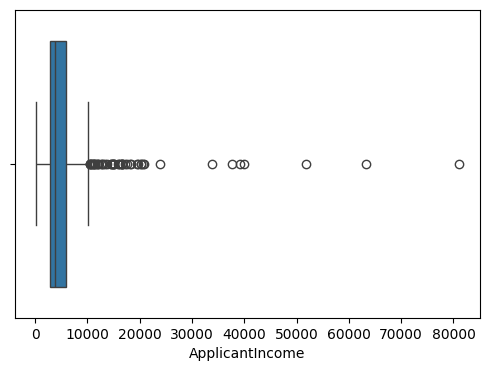

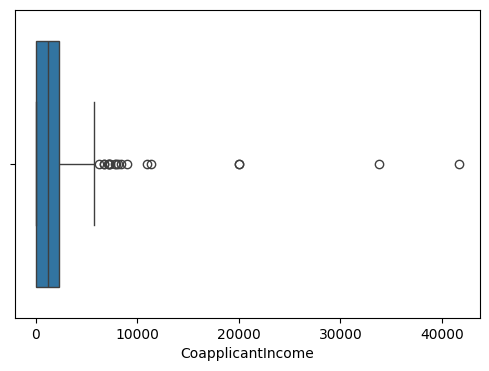

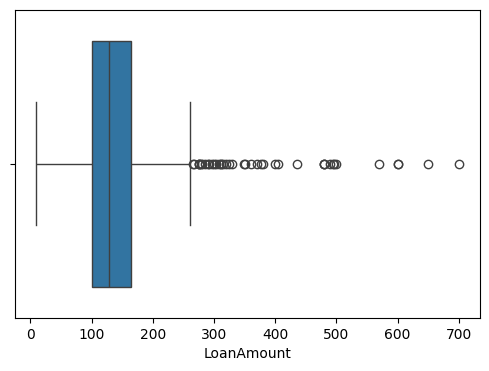

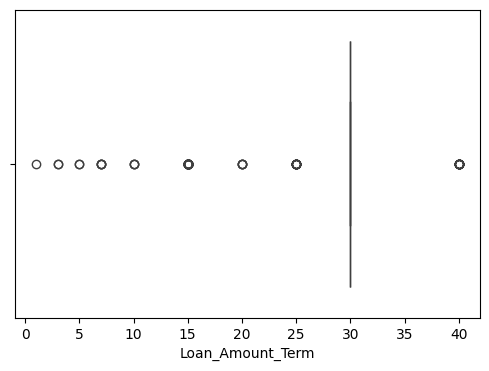

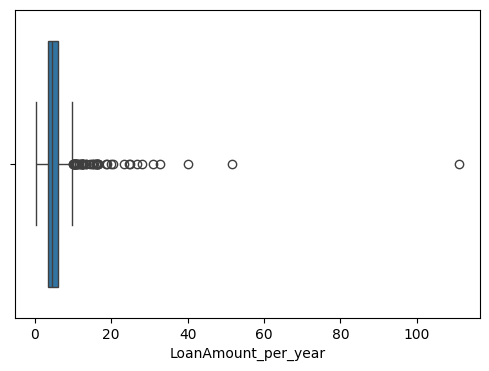

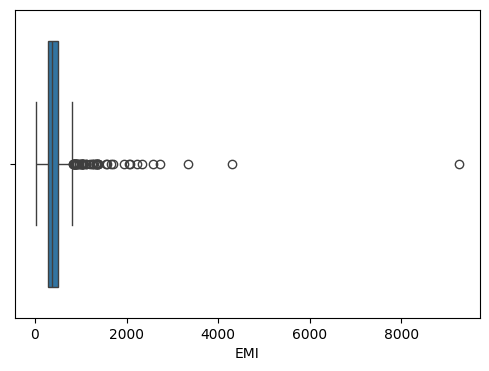

In [ ]:
for col in enumerate(df_num):
    sns.boxplot(x=col[1], data=df_num)
    plt.show()

In [ ]:
q1 = df_num.quantile(0.25)
q3 = df_num.quantile(0.75)

IQR = q3 -  q1
print(IQR)

ApplicantIncome        2917.500000
CoapplicantIncome      2297.250000
LoanAmount               64.500000
Loan_Amount_Term          0.000000
LoanAmount_per_year       2.500000
EMI                     208.333333
dtype: float64


In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_bin,LoanAmount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,128.0,30.0,1.0,Urban,Y,Medium,4.383333,365.277778,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,4.700000,391.666667,1


In [ ]:
df_iqr = data[~(df_num[(df_num < (q1 - 1.5*IQR)) | (df_num > (q3 + 1.5*IQR))]).any(axis=1)]
df_iqr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_bin,LoanAmount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,128.0,30.0,1.0,Urban,Y,Medium,4.383333,365.277778,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,4.700000,391.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,3232,1950.0,108.0,30.0,1.0,Rural,Y,Average,3.600000,300.000000,1
609,Female,No,0,Graduate,No,2900,0.0,71.0,30.0,1.0,Rural,Y,Average,2.366667,197.222222,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,30.0,1.0,Urban,Y,H2,8.433333,702.777778,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,30.0,1.0,Urban,Y,H1,6.233333,519.444444,1


#Z Score method

In [ ]:
from scipy.stats import zscore

z_score_loan_amt = zscore(df_num["LoanAmount"])
z_score_loan_amt

0     -0.211241
1     -0.211241
2     -0.948996
3     -0.306435
4     -0.056551
         ...   
609   -0.889500
610   -1.258378
611    1.276168
612    0.490816
613   -0.151745
Name: LoanAmount, Length: 614, dtype: float64

In [ ]:
row_index_more = np.where(z_score_loan_amt > 3)
print(row_index_more)

(array([130, 155, 171, 177, 278, 308, 333, 369, 432, 487, 506, 523, 525,
       561, 604]),)


In [ ]:
row_index_less = np.where(z_score_loan_amt < -3)
print(row_index_less)

(array([], dtype=int64),)


In [ ]:
df_loan_amt_zscore = data['LoanAmount'][~((z_score_loan_amt < -3) | (z_score_loan_amt > 3))]
df_loan_amt_zscore

0      128.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 599, dtype: float64

In [ ]:
len(df_loan_amt_zscore)

599

#Cat to Numerical

In [ ]:
df_iqr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_bin,LoanAmount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,128.0,30.0,1.0,Urban,Y,Medium,4.383333,365.277778,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,4.700000,391.666667,1


In [ ]:
cat = data.select_dtypes(include  = ["object"])

cat.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status', 'income_bin'],
      dtype='object')

In [ ]:
cat['Able_to_pay_EMI'] = df_iqr['Able_to_pay_EMI']
cat['Credit_History'] = df_iqr['Credit_History']
cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,income_bin,Able_to_pay_EMI,Credit_History
0,Male,No,0,Graduate,No,Urban,Y,Medium,0.0,1.0
1,Male,Yes,1,Graduate,No,Rural,N,Medium,1.0,1.0
2,Male,Yes,0,Graduate,Yes,Urban,Y,Average,1.0,1.0
3,Male,Yes,0,Not Graduate,No,Urban,Y,Average,1.0,1.0
4,Male,No,0,Graduate,No,Urban,Y,Medium,1.0,1.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_iqr["Loan_Status"].value_counts()

Loan_Status
Y    326
N    133
Name: count, dtype: int64

In [ ]:
col='Loan_Status'
label_encoder=LabelEncoder()
df_iqr[col]=label_encoder.fit_transform(df_iqr[col])
df_iqr[col].value_counts()

Loan_Status
1    326
0    133
Name: count, dtype: int64

In [ ]:
#HW -->

'''
col="Gender"
df_iqr[col]=label_encoder.fit_transform(df_iqr[col])
df_iqr[col].value_counts()

col="Education"
df_iqr[col]=label_encoder.fit_transform(df_iqr[col])
df_iqr[col].value_counts()

col="Married"
df_iqr[col]=label_encoder.fit_transform(df_iqr[col])
df_iqr[col].value_counts()

'''

'\ncol="Gender"\ndf_iqr[col]=label_encoder.fit_transform(df_iqr[col])\ndf_iqr[col].value_counts()\n\ncol="Education"\ndf_iqr[col]=label_encoder.fit_transform(df_iqr[col])\ndf_iqr[col].value_counts()\n\ncol="Married"\ndf_iqr[col]=label_encoder.fit_transform(df_iqr[col])\ndf_iqr[col].value_counts()\n\n'

In [ ]:
col = "Property_Area"
df_iqr[col].value_counts()

Property_Area
Semiurban    178
Rural        144
Urban        137
Name: count, dtype: int64

In [ ]:
!pip install --upgrade category_encoders

In [ ]:
from category_encoders import TargetEncoder

In [ ]:
pd.crosstab(df_iqr["Property_Area"], df_iqr["Loan_Status"])

Loan_Status,0,1
Property_Area,,
Rural,52,92
Semiurban,36,142
Urban,45,92


In [ ]:
pd.crosstab(df_iqr["Property_Area"], df_iqr["Loan_Status"], normalize = "index")

Loan_Status,0,1
Property_Area,,
Rural,0.361111,0.638889
Semiurban,0.202247,0.797753
Urban,0.328467,0.671533


In [ ]:
col="Property_Area"

te = TargetEncoder()

# here I need to pass 2 things as parameters. 1st the column that I'm working on
# 2nd the Target column

df_iqr[col]=te.fit_transform(df_iqr[col],df_iqr["Loan_Status"])
df_iqr[col].value_counts()

Property_Area
0.797753    178
0.638889    144
0.671533    137
Name: count, dtype: int64

In [ ]:
#HW

'''

col="Self_Employed"
te=TargetEncoder()
df_iqr[col]=te.fit_transform(df_iqr[col],df_iqr["Loan_Status"])
df_iqr[col].value_counts()

col="Dependents"
te=TargetEncoder()
df_iqr[col]=te.fit_transform(df_iqr[col],df_iqr["Loan_Status"])
df_iqr[col].value_counts()

col="income_bin"
te=TargetEncoder()
df_iqr[col]=te.fit_transform(df_iqr[col],df_iqr["Loan_Status"])
df_iqr[col].value_counts()
'''

'\n\ncol="Self_Employed"\nte=TargetEncoder()\ndf_iqr[col]=te.fit_transform(df_iqr[col],df_iqr["Loan_Status"])\ndf_iqr[col].value_counts()\n\ncol="Dependents"\nte=TargetEncoder()\ndf_iqr[col]=te.fit_transform(df_iqr[col],df_iqr["Loan_Status"])\ndf_iqr[col].value_counts()\n\ncol="income_bin"\nte=TargetEncoder()\ndf_iqr[col]=te.fit_transform(df_iqr[col],df_iqr["Loan_Status"])\ndf_iqr[col].value_counts()\n'

#Standardization

In [ ]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler

# instantiate the standardscaler
standard_scale = StandardScaler()

# fit the StandardScaler
df_num['Scaled_LoanAmount'] = standard_scale.fit_transform(df_num[['LoanAmount']])

# calculate the minimum and maximum values of the variable
print(" The minimum value of the sales:",df_num['Scaled_LoanAmount'].min(),"\n",
      "The maximum value of the sales:", df_num['Scaled_LoanAmount'].max())

 The minimum value of the sales: -1.627255298188799 
 The maximum value of the sales: 6.59514560674599


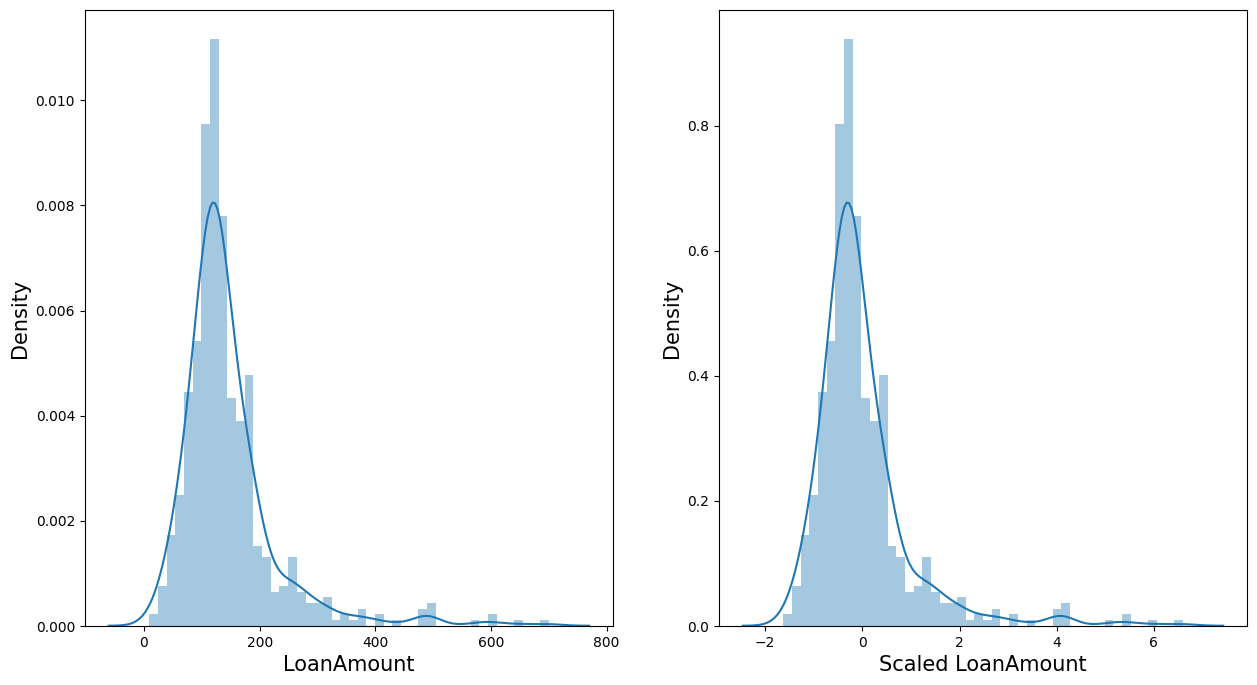

In [ ]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# subplot is used to create a set of plots
# we create a subplot of 1 row by 2 columns
# use first column for plotting
plt.subplot(1,2,1)

# plot the distribution of the original variable
# axlabel: label the x-axis
sns.distplot(df_num['LoanAmount'])
# set label for the y-axis
plt.ylabel('Density', fontsize=15)
# set label for x-axis
plt.xlabel('LoanAmount', fontsize=15)

# We create a subplot of 1 row by 2 columns
# use the second column for plotting
plt.subplot(1,2,2)

# plot the distribution of the scaled variable
# axlabel: label the x-axis
sns.distplot(df_num['Scaled_LoanAmount'])
# set label for the y-axis
plt.ylabel('Density', fontsize=15)
# set label for the x-axis
plt.xlabel('Scaled LoanAmount', fontsize=15)
# display the plot
plt.show()

#Normalization

In [ ]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# instantiate the MinMaxScaler
min_max = MinMaxScaler()

# fit the MinMaxScaler
df_num['minmax_LoanAmount'] = min_max.fit_transform(df_num[['LoanAmount']])

# minimum and maximum value of the normalized variable
df_num['minmax_LoanAmount'].min(), df_num['minmax_LoanAmount'].max()

(0.0, 1.0)

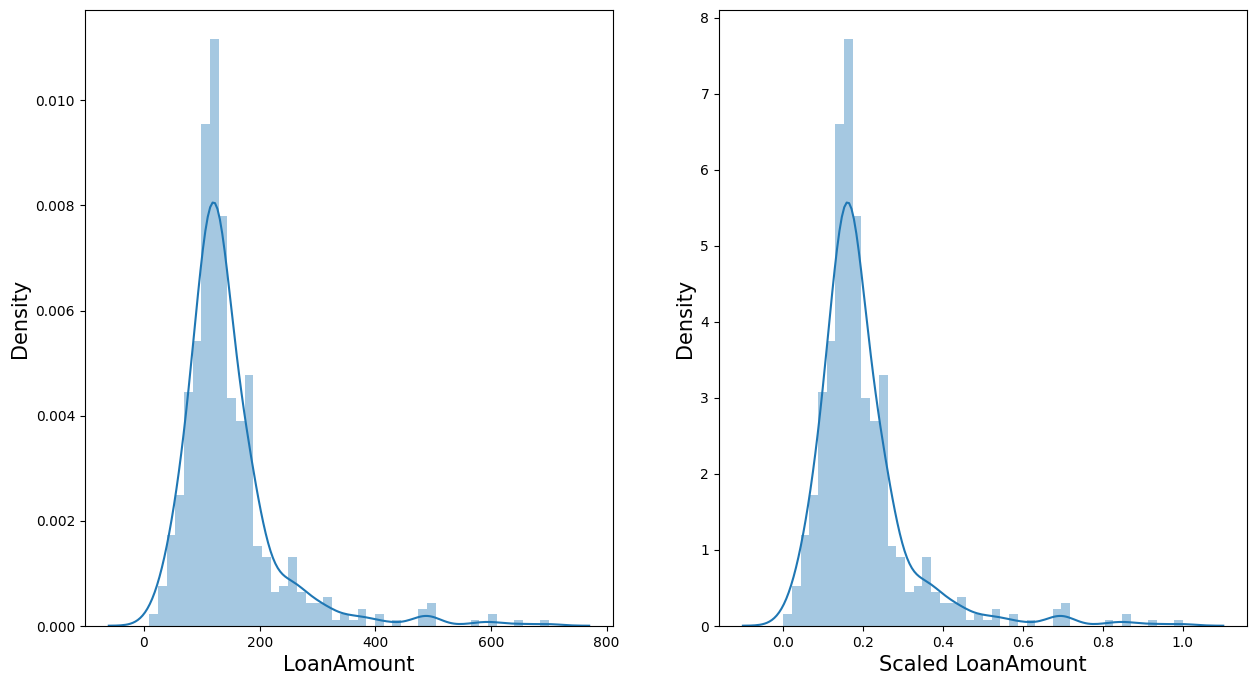

In [ ]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# subplot is used to create a set of plots
# We create a subplot of 1 row by 2 columns
# use the first column for plotting
plt.subplot(1,2,1)

# plot the distribution of the original variable
# axlabel: label the x-axis
sns.distplot(df_num['LoanAmount'], axlabel='LoanAmount')
# set label for the y-axis
plt.ylabel('Density', fontsize=15)
# set label for the x-axis
plt.xlabel('LoanAmount', fontsize=15)

# we create a subplot of 1 row by 2 columns
# use the second column for plotting
plt.subplot(1,2,2)

# plot the distribution of the scaled variable
# axlabel: label the x-axis
sns.distplot(df_num['minmax_LoanAmount'], axlabel='Scaled LoanAmount')
# set label for the y-axis
plt.ylabel('Density', fontsize=15)
# set label for the x-axis
plt.xlabel('Scaled LoanAmount', fontsize=15)

# display the plot
plt.show()